In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [26]:
fname_symptom = 'databases' + os.sep + 'orphadata' + os.sep + 'symptoms_HPO.dat'
fname_disease = 'databases' + os.sep + 'orphadata' + os.sep + 'diseases_HPO.dat'
fname_arr = 'databases' + os.sep + 'orphadata' + os.sep + 'matrix_HPO.dat'
fname_symptom_patient = 'databases' + os.sep + 'orphadata' + os.sep + 'rare_symptom_vector_HPO.dat'

def read_pickle(fname):
    with open(fname, 'rb') as f:
        x = pickle.load(f)
    return x

symptoms = read_pickle(fname_symptom)
diseases = read_pickle(fname_disease)
symptom_disease_arr = read_pickle(fname_arr)
patient_symptoms = read_pickle(fname_symptom_patient)
print(type(symptoms), type(diseases), type(symptom_disease_arr), type(symptom_disease_arr[0]))
print(len(symptoms), len(diseases), len(symptom_disease_arr), len(symptom_disease_arr[0]))
print(len(patient_symptoms), len(diseases), len(symptom_disease_arr), len(symptom_disease_arr[0]))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>
6371 3563 3563 6371
6371 3563 3563 6371


In [46]:
row_normalize = True
B = np.array(symptom_disease_arr)
C = np.array(symptom_disease_arr)

print(B.shape)
n_disease = B.shape[0]
n_symptom = B.shape[1]
assert B.shape[0] == 3563

if row_normalize:
    row_sums = B.sum(axis=1)
    B_norm = B / row_sums[:, np.newaxis]
    row_sums = B_norm.sum(axis=1)
    B = B_norm
    print (row_sums, np.min(row_sums), np.max(row_sums))
    
print( (B==C).all() )

(3563, 6371)
[1. 1. 1. ... 1. 1. 1.] 0.9999999999999996 1.0000000000000004
False


In [ ]:
plt.hist(np.dot(B, np.ones(n_symptom)), bins=100)
plt.show()

plt.hist(np.dot(B.T, np.ones(n_disease)), bins=100)
plt.show()

plt.hist(np.dot(C, np.ones(n_symptom)), bins=100)
plt.show()

plt.hist(np.dot(C.T, np.ones(n_disease)), bins=100)
plt.show()

In [43]:
diseases_patient_norm = np.dot(B, patient_symptoms)

sorted_diseases_norm = np.argsort(diseases_patient_norm)[::-1]

diseases_patient = np.dot(C, patient_symptoms)

sorted_diseases = np.argsort(diseases_patient)[::-1]

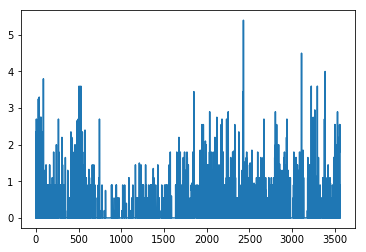

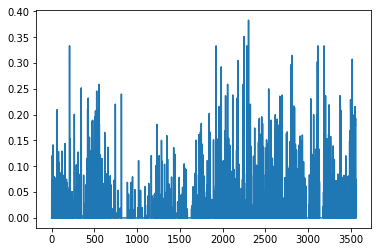

In [44]:
plt.plot(diseases_patient)
plt.show()

plt.plot(diseases_patient_norm)
plt.show()

In [40]:
print("Diseases from symptom vector")
for idx in range(10):
    print('Rank %d' % idx, diseases[sorted_diseases[idx]], diseases_patient[sorted_diseases[idx]])
    
print(" ==== ==== ")
print("Diseases from symptom vector normalized")
for idx in range(10):
    print('Rank %d' % idx, diseases[sorted_diseases_norm[idx]], diseases_patient_norm[sorted_diseases_norm[idx]])

Diseases from symptom vector
Rank 0 Mitochondrial neurogastrointestinal encephalomyopathy 5.4
Rank 1 Acute intermittent porphyria 4.5
Rank 2 Aggressive systemic mastocytosis 4.0
Rank 3 Williams syndrome 3.8
Rank 4 Addison disease 3.6
Rank 5 Acute adrenal insufficiency 3.6
Rank 6 Late-onset isolated ACTH deficiency 3.6
Rank 7 Hereditary coproporphyria 3.6
Rank 8 Rabies 3.6
Rank 9 Lynch syndrome 3.45
 ==== ==== 
Diseases from symptom vector normalized
Rank 0 Mitochondrial neurogastrointestinal encephalomyopathy 5.4
Rank 1 Acute intermittent porphyria 4.5
Rank 2 Aggressive systemic mastocytosis 4.0
Rank 3 Williams syndrome 3.8
Rank 4 Addison disease 3.6
Rank 5 Acute adrenal insufficiency 3.6
Rank 6 Late-onset isolated ACTH deficiency 3.6
Rank 7 Hereditary coproporphyria 3.6
Rank 8 Rabies 3.6
Rank 9 Lynch syndrome 3.45
